In [9]:
!pip install mplfinance

import datetime
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.dates import MONDAY, DayLocator, WeekdayLocator, DateFormatter
from matplotlib.ticker import MultipleLocator

from mplfinance.original_flavor import candlestick_ohlc

In [10]:
# Чтение датасета
df = pd.read_csv('Daily-DOGE-USD.csv') 

In [11]:
# Вывод статистики по столбцам
# Среднее арифметическое, стандартное отклонение, минимум/максимум
numeric_df = df.loc[:, ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
statistics = numeric_df.describe()

# Медианное значение и мода
statistics.loc['median'] = numeric_df.median().values
statistics.loc['mode'] = numeric_df.mode().values[0]
statistics

Open         High          Low        Close    Adj Close  \
count   1458.000000  1458.000000  1458.000000  1458.000000  1458.000000   
mean       0.033272     0.036116     0.030603     0.033487     0.033487   
std        0.092222     0.101371     0.083382     0.092597     0.092597   
min        0.000762     0.000783     0.000626     0.000755     0.000755   
25%        0.002373     0.002441     0.002312     0.002374     0.002374   
50%        0.002828     0.002929     0.002769     0.002836     0.002836   
75%        0.005095     0.005403     0.004743     0.005131     0.005131   
max        0.687801     0.737567     0.608168     0.684777     0.684777   
median     0.002828     0.002929     0.002769     0.002836     0.002836   
mode       0.002595     0.002619     0.002443     0.002054     0.002054   

              Volume  
count   1.458000e+03  
mean    9.026038e+08  
std     3.842058e+09  
min     1.072410e+06  
25%     1.672411e+07  
50%     4.818314e+07  
75%     1.610538e+08  
max     6.941068e+10  
median  4.818314e+07  
mode    1.072410e+06

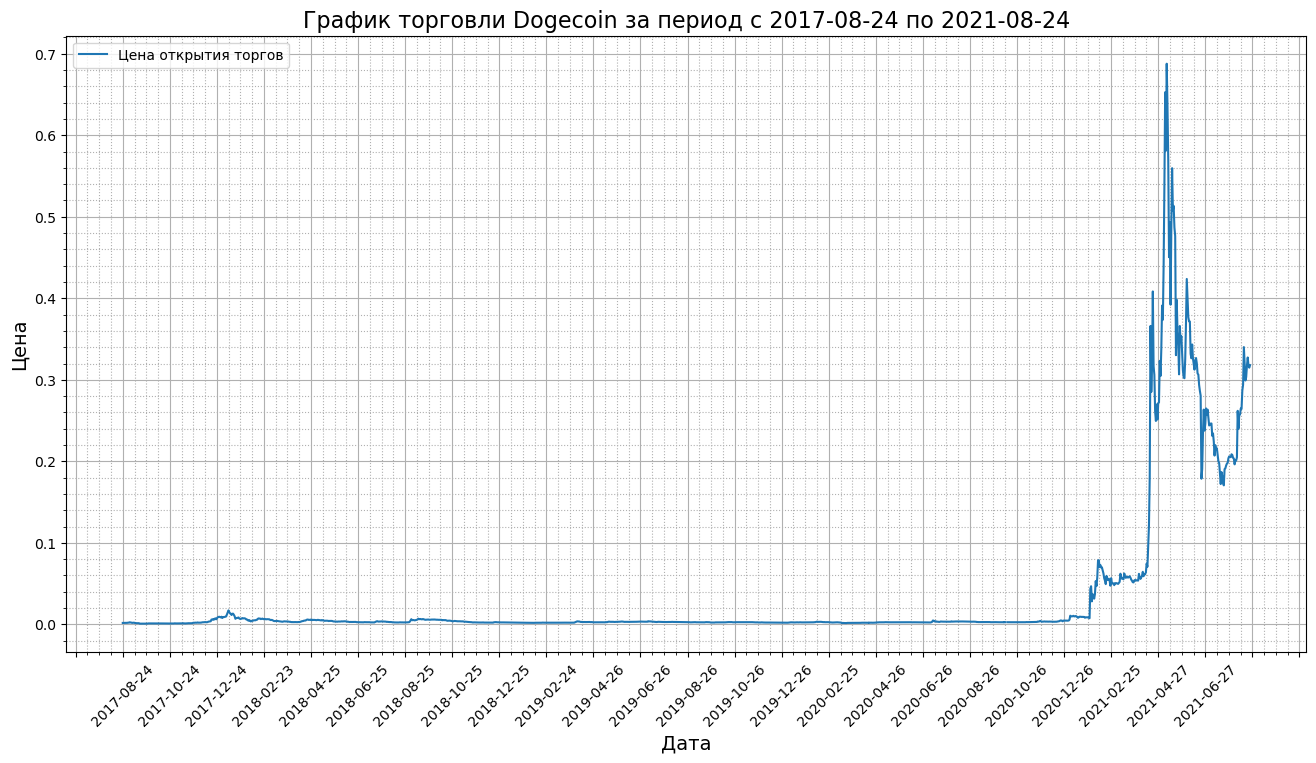

In [12]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.set_title('График торговли Dogecoin за период с 2017-08-24 по 2021-08-24', fontsize=16)
ax.set_xlabel('Дата', fontsize=14)
ax.set_ylabel('Цена', fontsize=14)

ax.minorticks_on()
ax.tick_params(axis='x', labelrotation = 45)
ax.xaxis.set_major_locator(MultipleLocator(61))

ax.grid(which='major')
ax.grid(which='minor', linestyle=':')

ax.plot(df['Date'], df['Open'],  label='Цена открытия торгов')
ax.legend(loc='upper left')

plt.show()

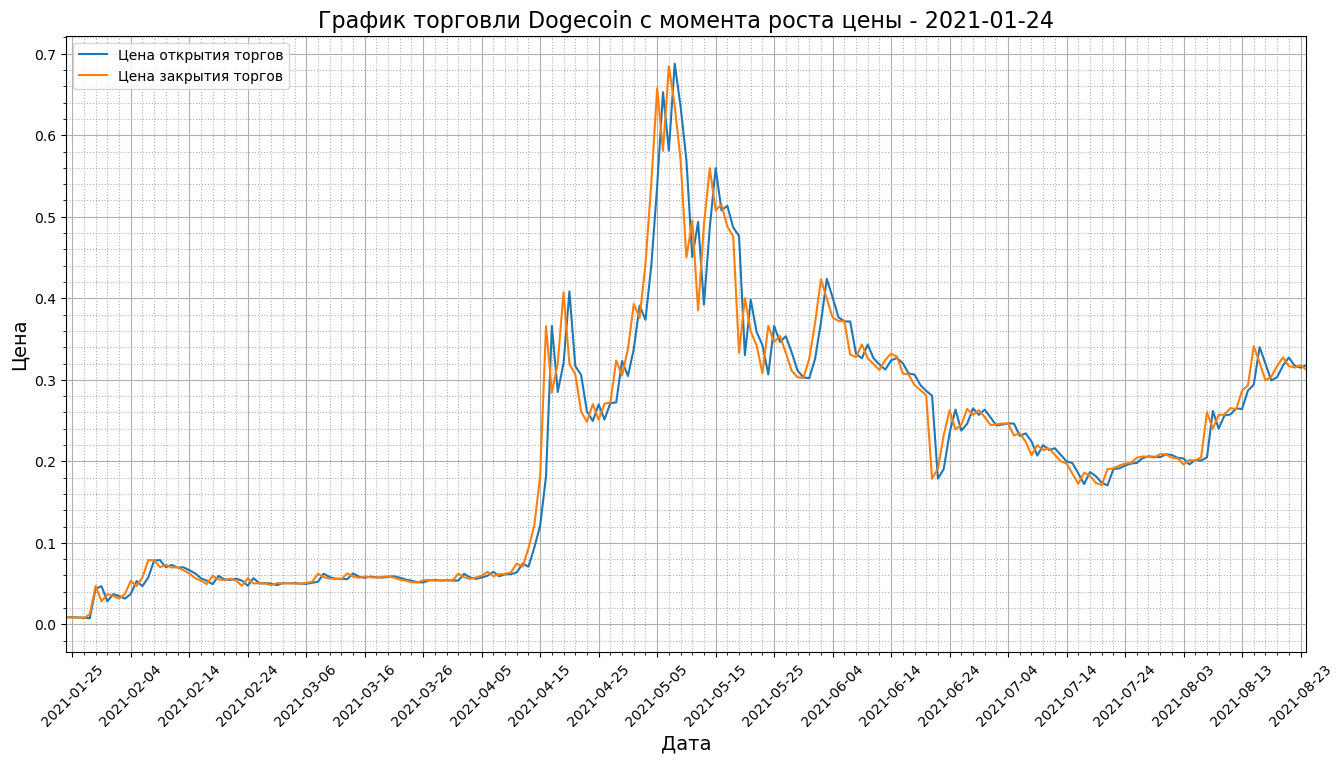

In [13]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.set_title('График торговли Dogecoin с момента роста цены - 2021-01-24', fontsize=16)
ax.set_xlabel('Дата', fontsize=14)
ax.set_ylabel('Цена', fontsize=14)

ax.minorticks_on()
ax.tick_params(axis='x', labelrotation = 45)
ax.xaxis.set_major_locator(MultipleLocator(10))

ax.grid(which='major')
ax.grid(which='minor', linestyle=':')

ax.plot(df['Date'], df['Open'],  label='Цена открытия торгов')
ax.plot(df['Date'], df['Close'],  label='Цена закрытия торгов')
ax.legend(loc='upper left')

ax.set_xlim(['2021-01-24', '2021-08-24'])

plt.show()

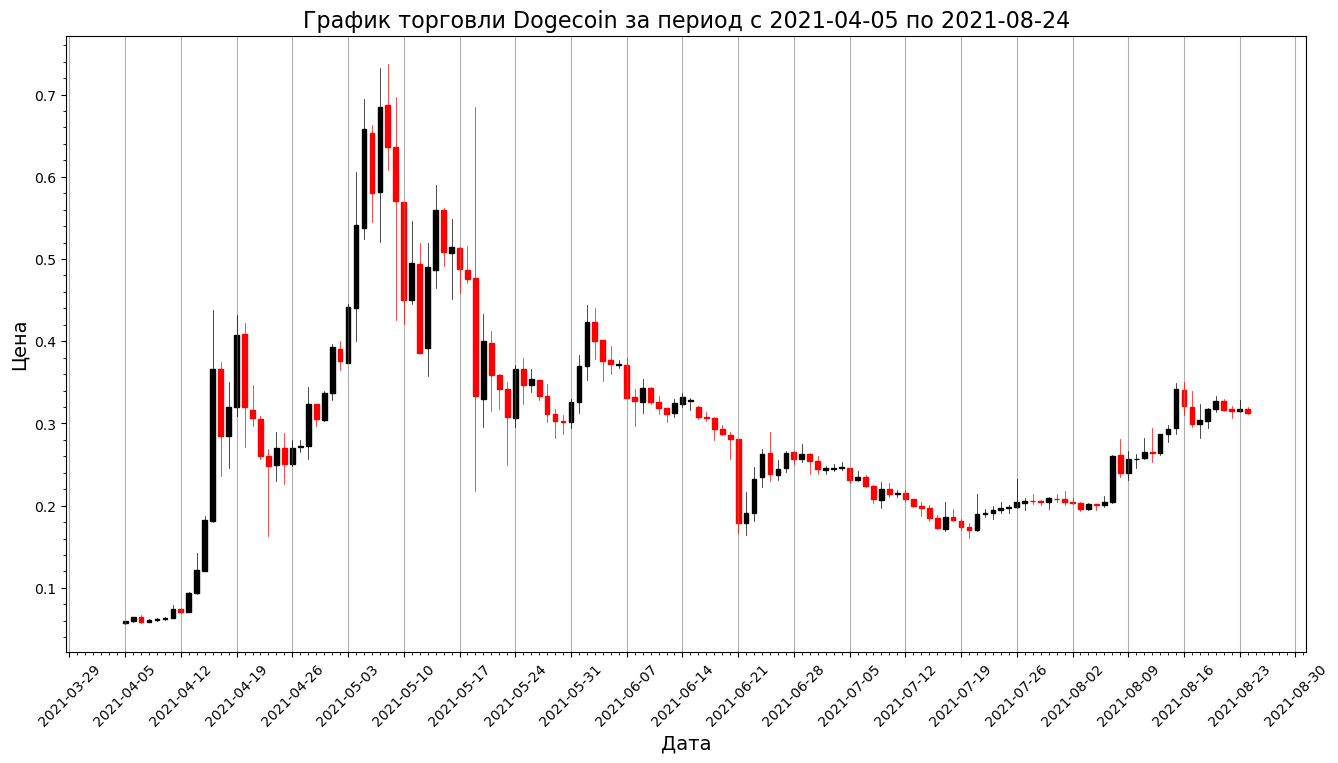

In [14]:
date_start = '2021-01-24'
date_start = '2021-04-05'
date_end = '2021-08-24'

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%Y-%m-%d')  # e.g., Jan 12

quotes = pd.read_csv('Daily-DOGE-USD.csv',
                     index_col=0,
                     parse_dates=True,
                     infer_datetime_format=True)

# select desired range of dates
quotes = quotes[(quotes.index >= date_start) & (quotes.index <= date_end)]

fig, ax = plt.subplots(figsize=(16, 8))

ax.set_title(f'График торговли Dogecoin за период с {date_start} по {date_end}', fontsize=16)
ax.set_xlabel('Дата', fontsize=14)
ax.set_ylabel('Цена', fontsize=14)

ax.minorticks_on()
ax.tick_params(axis='x', labelrotation = 45)

ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
ax.xaxis_date()

ax.grid(axis='x', which='major')
# ax.grid(which='minor', linestyle=':')

candlestick_ohlc(ax, zip(mdates.date2num(quotes.index.to_pydatetime()),
                         quotes['Open'], quotes['High'],
                         quotes['Low'], quotes['Close']),
                 width=0.6)

plt.show()

Date
2021-01-31           6.033008e+10
2021-02-28           1.346442e+11
2021-03-31           3.871090e+10
2021-04-30           3.511569e+11
2021-05-31           4.147622e+11
2021-06-30           1.001140e+11
2021-07-31           5.208312e+10
2021-08-31           9.099241e+10
Other (41 months)    7.320267e+10
Name: Volume, dtype: float64


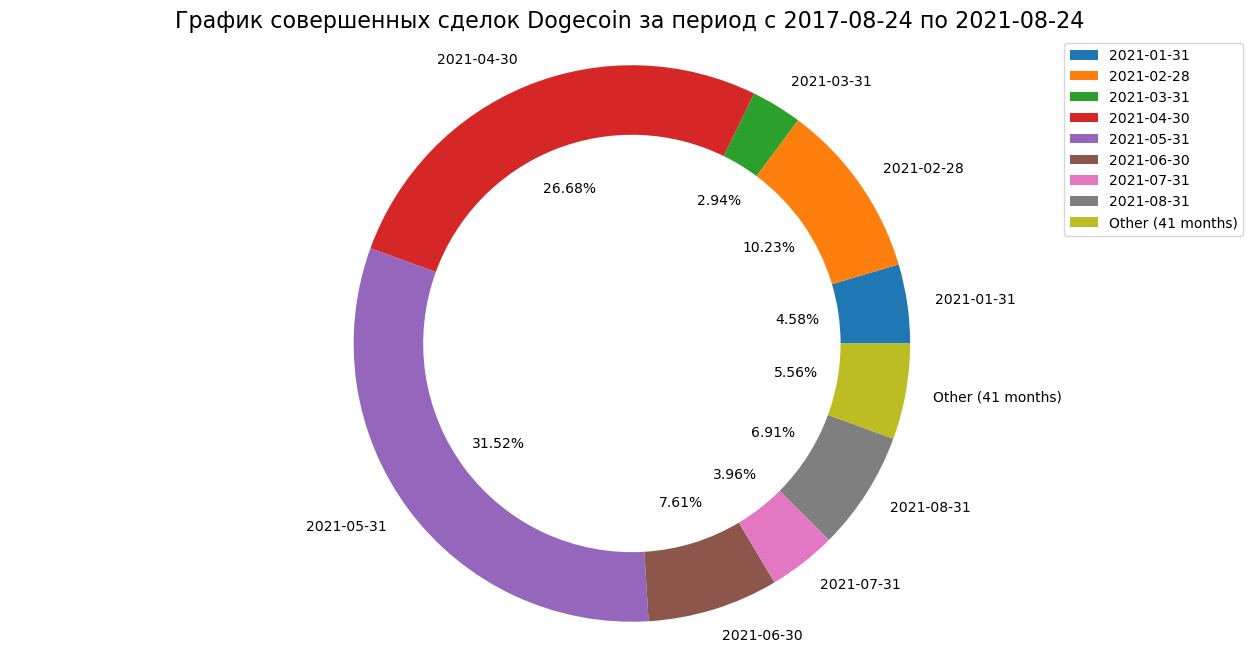

In [16]:
df_group = df.copy()
df_group['Date'] = pd.to_datetime(df_group['Date'])
df_group = df_group.groupby(pd.Grouper(key='Date', freq='M')).sum()
df_group = df_group.sort_values(by='Volume', ascending=False)

df_volume = df_group['Volume'][:8].sort_index()
df_volume.index = df_volume.index.astype(str)
df_volume.loc['Other (41 months)'] = df_group['Volume'][8:].sum()
print(df_volume)

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title('График совершенных сделок Dogecoin за период с 2017-08-24 по 2021-08-24', fontsize=16)

ax.pie(df_volume, labels=df_volume.index, autopct='%1.2f%%', wedgeprops=dict(width=0.25))
ax.axis('equal')
ax.legend(bbox_to_anchor=(1.0, 1.0))

plt.show()